## INTRODUCTION

This data was extracted from the census bureau database.

Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

#### DESCRIPTION ON DATA

48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### READ THE DATASET

##### NOTE
Before extracting the data, extract all the column names from the adult.names file

In [2]:
# Read the column names
col_names = list(pd.read_csv("adult.names", sep=":",skiprows=94).index)
# Append Income as last row into the list
col_names.append("Income")

In [3]:
# list all the column names
col_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Income']

In [4]:
# Read the data set
# Please note the data set is already been split into train and test.

train = pd.read_csv("adult.data",na_values="?",names=col_names )
test = pd.read_csv("adult.test",na_values="?",names=col_names, skiprows=1)

In [5]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
# Merge both the data sets
data = pd.concat([train, test], axis=0)

In [8]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### ANALYSE THE DATA

In [9]:
# First lets conver the the income column to specific binaries
data.Income.value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: Income, dtype: int64

In [10]:
data['Income']=data['Income'].map({' <=50K': 0, ' >50K': 1, ' <=50K.': 0, ' >50K.': 1})

In [11]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### NOTE

Clearly from the dataset there are categorical and numerical columns

In [12]:
numeric_features = list(data.describe().columns)
print ("The Numerical Features are : \n", numeric_features)

The Numerical Features are : 
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'Income']


In [13]:
categorical_features = list(data.describe(include='dtype').columns)
print ("The Categorical Features are : \n", categorical_features)

The Categorical Features are : 
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


#### PLOT 1
Count number of people who get <=50k and > 50K

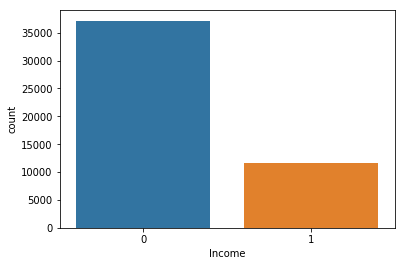

In [14]:
sns.countplot(data['Income'],label="Count")

#### PLOT 2

Display the co-relation of all the numerical features

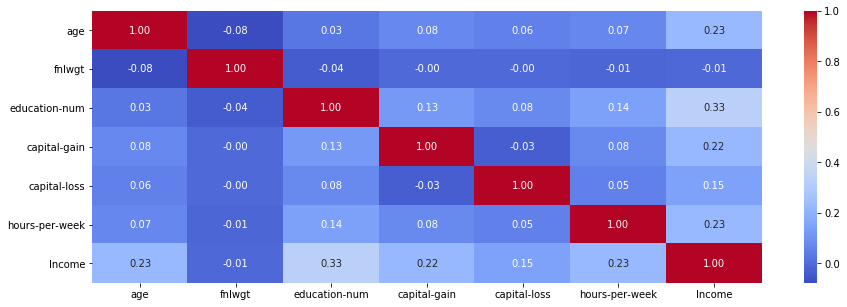

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(data[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

#### PLOT 3

Display the education number to income 

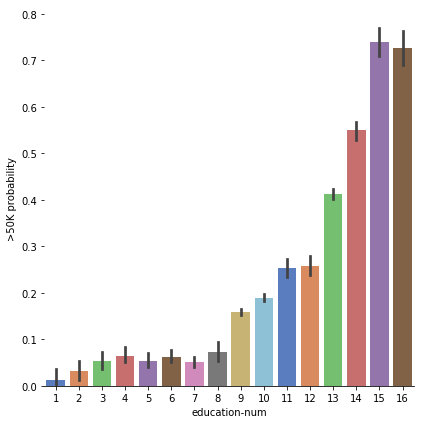

In [16]:
# Explore Education Num vs Income
g = sns.catplot(x="education-num",y="Income",
                data=data,kind="bar",height = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

#### PLOT 4

Display the Distribution of the age

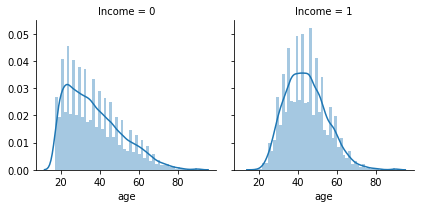

In [17]:
# Explore Age vs Income
g = sns.FacetGrid(data, col='Income')
g = g.map(sns.distplot, "age")

#### CATEGORICAL DATA ANALYSIS

In [18]:
data.describe(include='dtype')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


In [19]:
# Check if there are a any null values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

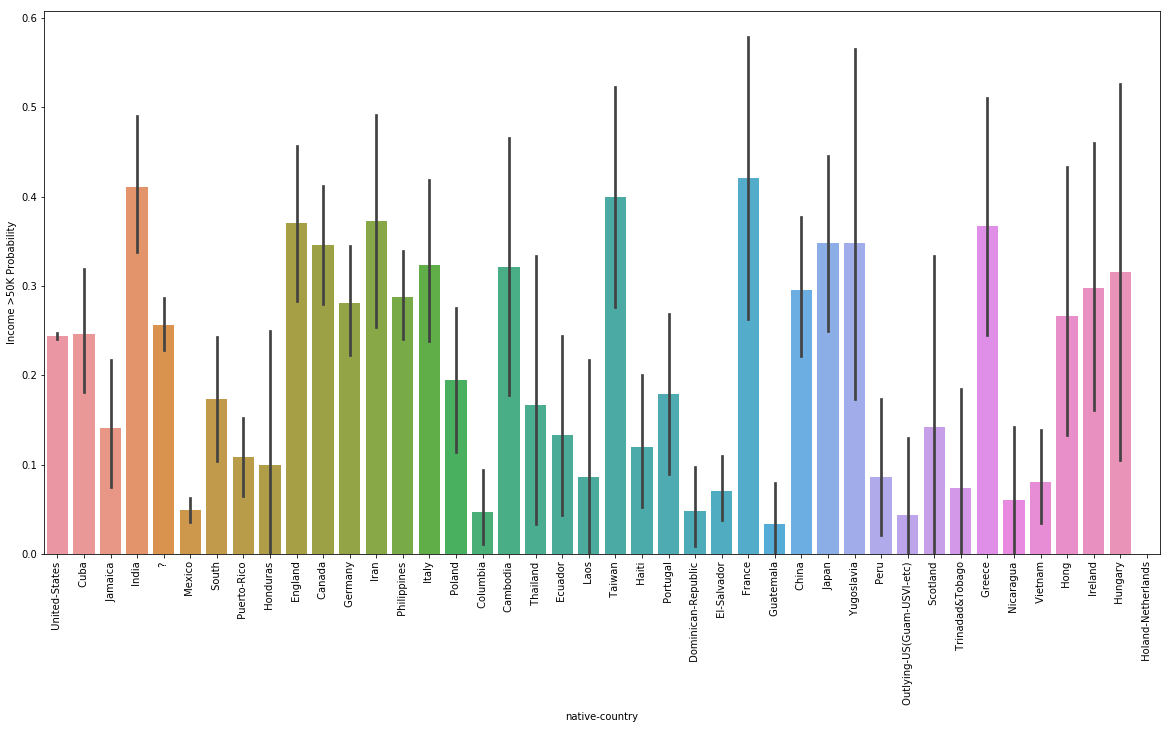

In [20]:
# Explore Native Nation vs Income
plt.figure(figsize=(20,10))
g = sns.barplot(x="native-country",y="Income",data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g = g.set_ylabel("Income >50K Probability")

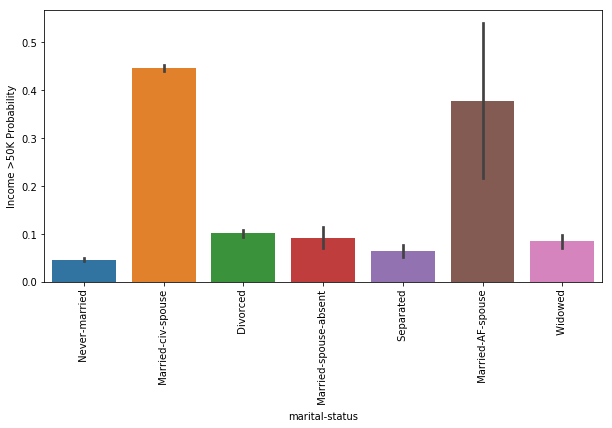

In [21]:
# Explore Marital vs Income
plt.figure(figsize=(10,5))
g = sns.barplot(x="marital-status",y="Income",data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g = g.set_ylabel("Income >50K Probability")

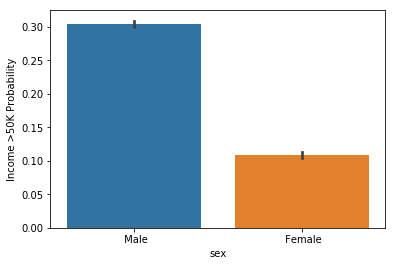

In [22]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="Income",data=data)
g = g.set_ylabel("Income >50K Probability")

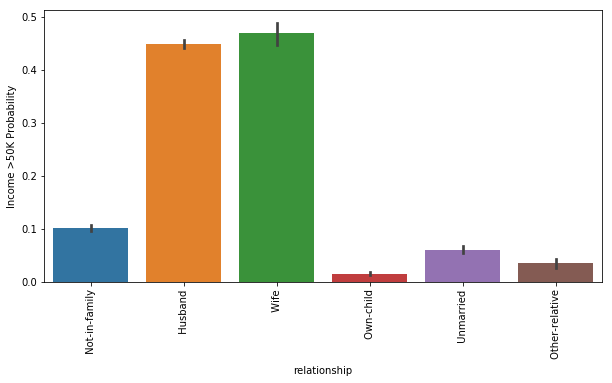

In [23]:
# Explore relationship vs Income
plt.figure(figsize=(10,5))
g = sns.barplot(x="relationship",y="Income",data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g = g.set_ylabel("Income >50K Probability")

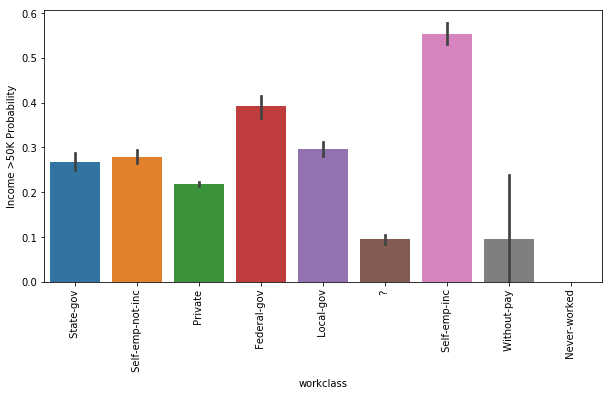

In [24]:
# Explore relationship vs Income
plt.figure(figsize=(10,5))
g = sns.barplot(x="workclass",y="Income",data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g = g.set_ylabel("Income >50K Probability")

In [25]:
data[(data["native-country"] == " United-States") & (data["education-num"] == 14)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,1
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,0
87,33,Private,202051,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
100,76,Private,124191,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
102,47,Self-emp-not-inc,149116,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,0
162,44,Self-emp-inc,78374,Masters,14,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,United-States,0
164,45,Self-emp-not-inc,201080,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,1
167,46,State-gov,102628,Masters,14,Widowed,Protective-serv,Unmarried,White,Male,0,0,40,United-States,0


#### INFERENCE

- An clear observation cannot be drawn whether the workclass has any bearing on the income. As you can see that a person working in "Private" can or cannot earn more than 50K.
- From Marital Status and relationsip status we could draw a reference that the Married people have more probability to earn more than 50K. So we can drop the realtionship column and condense the marital status column to a binary of married or single.
- Country has no bearing on the Income. from the above dataset row 87 and 100 for the same workclass, education number, realtionshop the person could not could not earn more than 50k . So drop Native countyr as well.
- Education is redundant as there is a column called education-num.

### FEATURE ENGINEERING

In [26]:
# Convert Sex value to 0 and 1
data["sex"] = data["sex"].map({" Male": 0, " Female":1})

In [27]:
# Create Married Column - Binary Yes(1) or No(0)
data["marital-status"] = data["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
data["marital-status"] = data["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
data["marital-status"] = data["marital-status"].map({"Married":1, "Single":0})
data["marital-status"] = data["marital-status"].astype(int)

In [28]:
# Drop the data you don't want to use
data.drop(labels=["workclass","education","occupation","relationship","race","native-country"], axis = 1, inplace = True)
data.head()


,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,0,0,2174,0,40,0
1,50,83311,13,1,0,0,0,13,0
2,38,215646,9,0,0,0,0,40,0
3,53,234721,7,1,0,0,0,40,0
4,28,338409,13,1,1,0,0,40,0


In [31]:
# Check if there are any nulls
data.isnull().sum().sum()

0

### MODELLING 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import xgboost as xgb

In [35]:
# Train and test split
#X_train, X_test, y_train, y_test = train_test_split(data.drop("Income", axis=1), data.Income, test_size=0.20)

In [42]:
#Spot Check 5 Algorithms (LR, LDA, KNN, CART, GNB, SVM)
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTREE', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100, max_features=3)))
models.append(('XGB', xgb.XGBClassifier(n_estimators=100)))

In [53]:
warnings.simplefilter('ignore')
# evalutate each model in turn
results = dict()

names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, data.drop("Income", axis=1), data.Income, cv=kfold, scoring='accuracy')
    results[name] = cv_results.mean()
    names.append(name)
    msg = "%5s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

   LR: 0.797776 (0.003119)
  KNN: 0.777937 (0.003290)
DTREE: 0.810737 (0.005535)
   RF: 0.841182 (0.003446)
  XGB: 0.859383 (0.004716)


In [54]:
results

{'LR': 0.7977764756475094,
 'KNN': 0.7779368723892777,
 'DTREE': 0.8107367486589595,
 'RF': 0.841181658070092,
 'XGB': 0.8593834650692378}

In [64]:
accuracy_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

#### PROBLEM 2
Which facotrs are important

In [68]:
# The factors that were considered
data.columns

Index(['age', 'fnlwgt', 'education-num', 'marital-status', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'Income'],
      dtype='object')

#### PROBLEM 3
Which algorithm are the best.

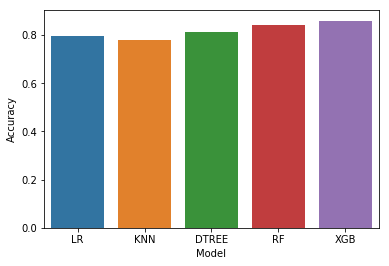

In [70]:
# Plot the various accuracy from the models that have been tried
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, )